In [1]:
from IPython import display

*Unpublished results are used in parts of this notebook*

# MIRACL's registration methods


- E.g. a hemisphere registration of a mouse brain (with nifti input image for comparison) done with MIRACL's `clar_allen` registration function:


In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1ErI98SCfkH4VC7-wgjWOp5VIRxWzWlV8/preview" width="840" height="400" allow="autoplay"></iframe>

## Methodological gap

- For an integrated analysis of multimodal data, precise image registration is essential, which is challenging because of stark differences in contrast across modalities, as well as tissue deformation after stroke and clearing.
- Registration of our cleared mouse stroke brains using available registration software yielded suboptimal results, prompting us to develop a workflow designed with both biologically and technically induced tissue deformation in mind.

## What is MIRACL's registration functionality?

- MIRACL's registration is a optimized, fully automated registration workflow based on the deformable B-spline algorithm implemented in ANTs to accurately map MRI and CT, as well as CLARITY whole brain and sections to the Allen Reference Atlas (ARA) space.
- For MIRACL's registration, we developed a recursive, similarity-based algorithm to search the corresponding whole-brain CLARITY volume and find the segment that corresponds best to the desired input section.
- This algorithm, which relied on a pyramid scheme using a sliding window with decreasing increments ensures an accurate part-to-whole registration for CLARITY sections.

MIRACL includes a multitude of registration functions:
```
clar_allen          whole-brain CLARITY registration to Allen atlas
mri_allen_ants      MRI registration to Allen atlas using ANTs
mri_allen_nifty     MRI registration to Allen atlas using NiftyReg
warp_clar           Warp CLARITY data to Allen space
warp_mr             Warp MRI data to Allen space
check               Check registration
```
E.g. Allen labels registered using MIRACL, overlaid on an CLARITY scan of an experimental mouse brain:

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1GHi16-9PS6az8vsxsI0UWpTq_phL3gb5/preview" width="800" height="640" allow="autoplay"></iframe>

MIRACL also includes a CLARITY registration workflow which combineds multiple MIRACL functions to:

```
1) Set the orientation of input data using a GUI
2) Convert TIFF stack to NII
3) Register CLARITY data (down-sampled images) to ARA
4) Warp Allen annotations to the original high-res CLARITY space
5) Warp the higher-resolution CLARITY to Allen space
```
E.g. a CLARITY registration workflow result visualized in ITK-SNAP:

In [ ]:
%%html
<iframe src="https://miracl.readthedocs.io/en/latest/_images/registration_result_in_itksnap.png" width="800" height="500" allow="autoplay"></iframe>

- This workflow allows the user to select the orientation of the brain simply using a GUI while performing conversion
- The complete tutorial on this workflow can be found [here](https://miracl.readthedocs.io/en/latest/tutorials/workflows/clarity_registration/clar_reg.html)
- An example of the GUI used to select the orientation direction can be seen [below](#orientation)

<a name="orientation"></a>
<img src="https://miracl.readthedocs.io/en/latest/_images/MIRACL_workflows_clar-reg_orientation_menu.png" width="50%">

## Usage example: MIRACL's CLARITY registration method

## Highlights:

- Registers CLARITY data (down-sampled images) to Allen Reference mouse brain atlas
- Warps Allen annotations to the original high-res CLARITY space
- Warps the higher-resolution CLARITY to Allen space


### GUI

**In** your `Docker`/`Singularity` container, open `MIRACL`'s main menu by typing:

```
$ miraclGUI
```

The following window will open:

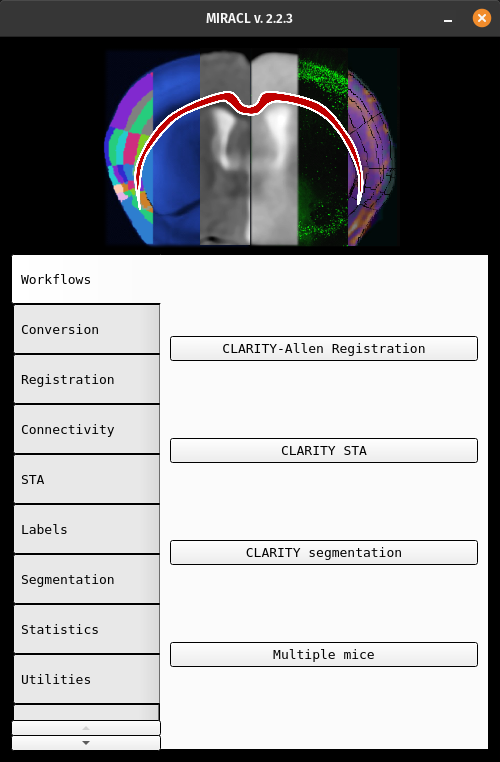

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/MIRACL_main-menu.png")

2. Select the Registration tab on the left for the main registration menu. The main registration window will look like this:


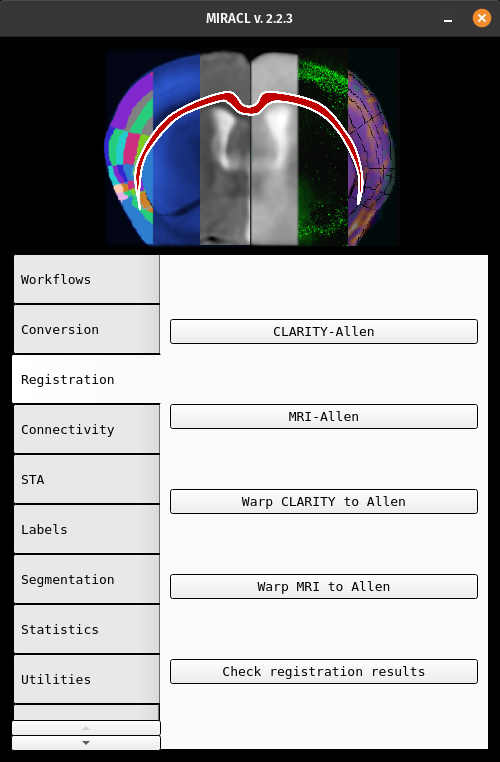

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/MIRACL_registration_main-menu.png")

From here you can select `CLARITY-Allen` to start the registration. The `Reg options` menu will open:

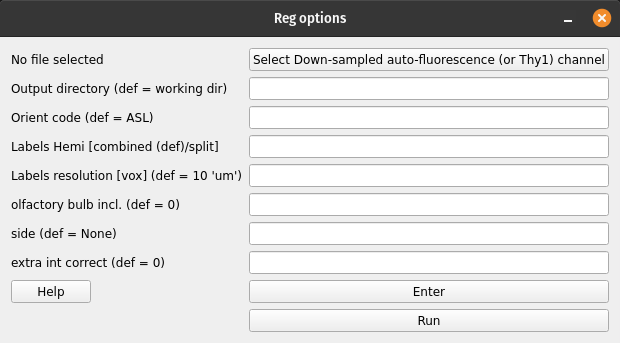

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/MIRACL_registration_clar-allen-menu.png")

The registration will be run on downsampled CLARITY Nii images. You can provide the folder containing these files in the first field. This parameter is required to run the registration. You can use MIRACL's conversion methods to create the downsampled files if you do not have them yet.

In [2]:
%%html
<iframe src="https://drive.google.com/file/d/1RU4c3-6h0buaEU7mn6V2IhofYwiZ092U/preview" width="900" height="160" allow="autoplay"></iframe>

All remaining parameters are optional. If left blank, their respective default values will be used:

In [3]:
%%html
<iframe src="https://drive.google.com/file/d/1FE-HluE76YBpvVMAR2tBO9n7MNk83Bw_/preview" width="900" height="625" allow="autoplay"></iframe>

Provide the parameters click `Enter` to save them and `Run` to start the registration process.

## Command line

For scripting and automation, the CLARITY registration function can be run direclty on the CLI using the following syntax:

```
$ miracl reg clar_allen \
  -i [ input_clarity_nii_folder ] \
  -o [ orientation_code ] \
  -m [ hemispheres ] \
  -v [ labels_resolution ] \
  -l [ input_labels ] \
  -s [ side_if_hemisphere_only ] \
  -b [ olfactory_buld_included ]
```

E.g.: To register both hemispheres of a `SHIELD` protocol, autofluorescent image with orientation `ALS` and a voxel resolution of `10` you would use the following command:

```
$ miracl reg clar_allen -i data/SHIELD_03x_down_autoflor_chan.nii.gz -o ALS -m combined -v 10
```

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1CZ_brRu_deSXRug914l1V1CfCLpe20oN/preview" width="820" height="560" allow="autoplay"></iframe>

## Main outputs:

The `reg_final` (default name) folder will contain the final results of the registration:
```
clar_allen_space.nii.gz: Clarity data in Allen reference space
clar_downsample_res(vox)um.nii.gz : Clarity data downsampled and oriented to "standard"
annotation_hemi_(hemi)_(vox)um_clar_downsample.nii.gz : Allen labels registered to downsampled Clarity
annotation_hemi_(hemi)_(vox)um_clar_vox.tif : Allen labels registered to oriented Clarity
annotation_hemi_(hemi)_(vox)um_clar.tif : Allen labels registered to original (full-resolution) Clarity
```
A second folder (`clar_allen_reg`) will be created that includes the intermediate files used to create the final registration outputs. These include e.g. a transformation matrix used for warping and additional downstream tasks.

## Additional examples of MIRACL's registration functionality

In [ ]:
%%html
<iframe src="https://miracl.readthedocs.io/en/latest/_images/clarity_registration_example.png" width="820" height="540" allow="autoplay"></iframe>

In [ ]:
%%html
<iframe src="https://miracl.readthedocs.io/en/latest/_images/clarity_registration_example2.png" width="780" height="560" allow="autoplay"></iframe>